In [1]:
#|include: false
from IPython.display import Markdown as md

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random as rn



# [DRAFT - WORK IN PROGRESS]

In the last century, a teacher was once complaining about the latest increase of the gasoline price. He was finishing his complains with a misogynistic joke:

:boar:: *The gas price went up a gain. It doesn't matter for my wife, though. She always refuels for 10 bugs. Hahaha.*

Besides you shouldn't talk like this about your wife, the idea of the always spending the same amount of money on the gas station to avoid price raises appealed to me pretty funny. I since used a variation of this da(e)d joke every now and then, like *"I always refuel for 10 bugs, lol."* and you certainly have heard this joke often, too.

Now, 25 years fast forward :fast_forward: ... 

I was driving with my wife to a party and she realized that I've filled the car after shopping. She was very happy that she wouldn't need to stop at the gas station during the upcoming week. I told here proudly that the price for gas was low and I saved 35ct per liter compared to four weeks ago. Once again I quietly had to think about this bad joke. Suddently, when I was just about to start grining I was struck by a though: *"Is it possible that the person, who is paying 10 bugs everytime, is right and the others, that are laughing about this strategy, are actually the idiots?!"*.

This thought come up because I've watched some YouTube videos about investment strategies. One example[^1] was to follow a saving plan and put the same amount of money into stocks on a regulare basis, say 100 Euro every month. A question come up, what happens when the market goes down and the portfolio looses value. The answer was pretty simple: *If you invest regularely then you hit the market when it goes up the one day and when it goes down the other day.* So the volatility doesn't matter that much on the long run. For an ML guy this totally made sense. The constant investing smoothes out the volatility. Since you can't predict the stock prices, you better not overfit, by trying to the **time** your investments.

Let's simulate 

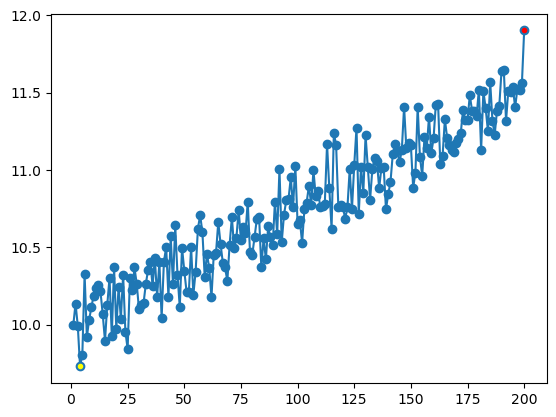

In [2]:
timeslots = 200
x = np.linspace(1, timeslots, timeslots)
trend = 1.5
vola = np.random.normal(0, 0.15, timeslots)#(np.random.random(timeslots)-.5)*.1 #05

y = 10 + x * trend/timeslots + vola

plt.plot(x, y)
plt.scatter(x, y)
#plt.plot(x[vola.argmax()], y[vola.argmax()], marker='o', markersize=3, color="red")
#plt.plot(x[vola.argmin()], y[vola.argmin()], marker='o', markersize=3, color="yellow")
plt.plot(x[y.argmax()], y[y.argmax()], marker='o', markersize=3, color="red")
plt.plot(x[y.argmin()], y[y.argmin()], marker='o', markersize=3, color="yellow")

In [3]:
best_return = y.max()/y.min()-1
best_return

0.22316300528622102

In [4]:
investment = timeslots * 100

md(f"earned = {investment*best_return} avg return: ")

earned = 4463.26010572442 avg return: 

In [5]:
cum_return1 = np.product(y[1:]/y[:-1])-1
cum_return1

0.1906906747092043

In [6]:
cum_return=((100/y).sum()*10.10 - investment)/investment
cum_return

-0.059095585585845586

In [7]:
y_con = 10+x* trend/timeslots*(1+cum_return)

In [8]:
(investment/y.min()*y.max() - investment)/investment

0.22316300528622104

In [9]:
y_cum_mean=y.cumsum()/np.ones(timeslots).cumsum()

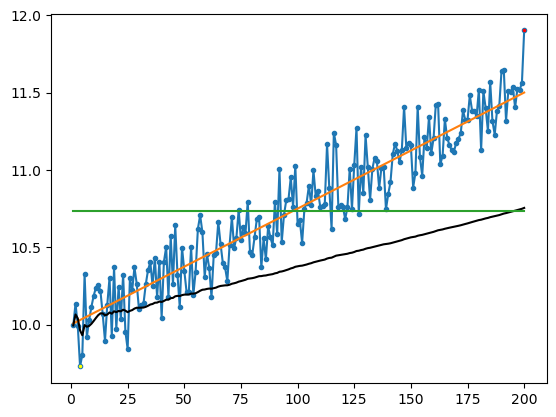

In [10]:
plt.plot(x, y)
#plt.plot(x, 10+x* trend/timeslots*(1+cum_return1))
plt.plot(x, 10+x*trend/timeslots)
plt.plot(x, y_cum_mean, color='black')
plt.plot(x,np.ones(timeslots)*investment/(100/y).sum())
plt.scatter(x, y, marker='.')
#plt.plot(x[vola.argmax()], y[vola.argmax()], marker='o', markersize=3, color="red")
#plt.plot(x[vola.argmin()], y[vola.argmin()], marker='o', markersize=3, color="yellow")
plt.plot(x[y.argmax()], y[y.argmax()], marker='.', markersize=3, color="red")
plt.plot(x[y.argmin()], y[y.argmin()], marker='.', markersize=3, color="yellow")

In [11]:
cum_amount = (investment/x)*(1/y).cumsum()

In [20]:
t_max=-1

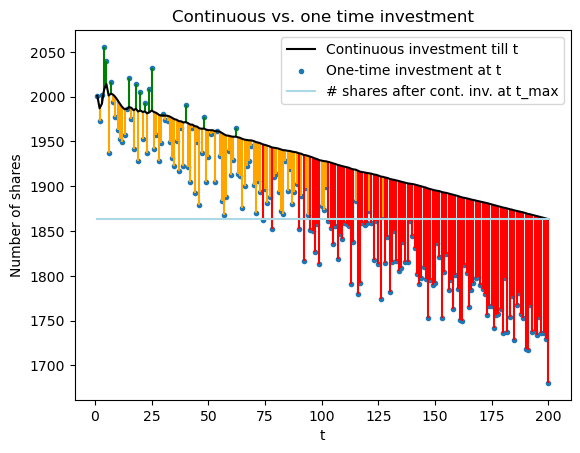

In [26]:
plt.errorbar(x, cum_amount, [(cum_amount-investment/y)*(cum_amount<investment/y),
                                                  -(cum_amount-investment/y)*(cum_amount>investment/y)],
            fmt = 'none',
            ecolor = np.vectorize({0:'r', 1:'orange', 2: 'green'}.get)(((cum_amount)<(investment/y))*1+(cum_amount[t_max]<(investment/y))*1))

plt.plot(x, cum_amount, label = 'Continuous investment till t', color = 'black')
plt.scatter(x,investment/y, label = 'One-time investment at t', marker = '.')
plt.plot(x, np.ones(timeslots)*cum_amount[t_max], label = '# shares after cont. inv. at t_max', color = 'lightblue')

plt.ylabel('Number of shares')
plt.xlabel('t')
plt.title('Continuous vs. one time investment')
plt.legend()

The **blue dots** mark the number of shares that can perchased when the entire money is invested at once at the given time *t*. 


Blue dots:
$$
onetime(t) = \frac{cash}{price_t}
$$

The **black line** indicates the number of shares that can be buyed when the entire investent is equally spread from *t=0* up to a given *t*.

Black line:
$$
continuous(t) = \sum^t_i{ \frac{cash/t}{price_i}} = \frac{cash}{t} \sum^t_i{ \frac{1}{price_i}}
$$

The **light blue line** highlights the number of shares of the last entry of the black line, hence the cash is equally invested over the entire period of time.

Light blue line:
$$
contmax(t) = continuous(n)
$$

A **green line** marks the one-time investment that always reach a higher number of shares compared to the continuous investment, regardless of the duration.

A **red lines** indicates the one-time investment that can never reach the number of shares of the continuous investment at any time in $0<t<=n$.

An **orange line** marks the one-time investment that has fewer number of shares as the continous investment at the given time, if the entire cash has been equally distrubted to the given *t*. However, if the continous investments are spread for a wider period of time, the one-time investment will be superior to the continuous investment at a later point in time.

With our dummy data the strategie to put a big investment at once is good if the investment can stay invested untouched for a long period of time. If the money needs to shortly be withdrawn from the investment the continous strategie is preferable, regarding number of shares. The tipping point between the strategies is close to $t/2$.

Let's see, next, how the amount of shares result in value at $t=n$, 

In [27]:

cum_cash = investment-x*(investment/timeslots)
cum_inv = ((investment/timeslots)*(1/y).cumsum())*y[t_max]
cum_value = cum_inv + cum_cash

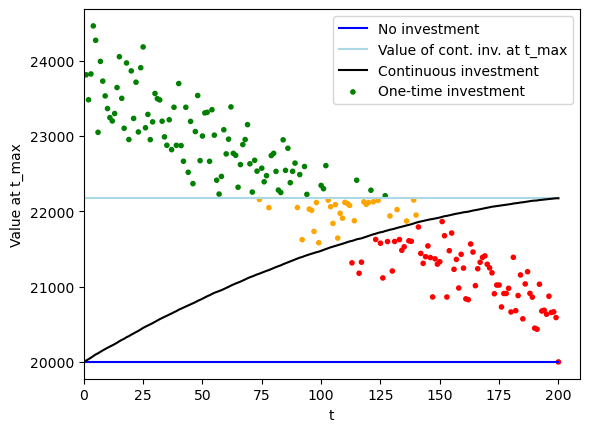

In [14]:
plt.plot(x, np.ones(timeslots)*investment, label = 'No investment', color = 'blue')
plt.plot(x, np.ones(timeslots)*cum_value[t_max], label = 'Value of cont. inv. at t_max', color = 'lightblue')
plt.plot(x, cum_value, label = 'Continuous investment', color = 'black')
#plt.plot(x, y[t_max]*investment/y, label = 'One-time investment',color='gray')
plt.scatter(x, y[t_max]*investment/y, label = 'One-time investment', marker='.',
           color=np.vectorize({0:'r', 1:'orange', 2: 'green'}.get)(((y[t_max]*investment/y)>(cum_value[t_max]))*1+(((y[t_max]*investment/y)>(cum_value))*1)))

plt.ylabel('Value at t_max')
plt.xlabel('t')
plt.xlim(0,timeslots+10+t_max)
plt.legend()

The blue line is our net worth if we don't invest and keep cash for the entire period of time.

Blue line:
$$
cash(t)=cash
$$

The black line inducates the net worth in a continuous investment strategie. At time *t* the number of share that are accumulated sofare are multiplied by the price at the end of the time periode. Also, the remaing cash at time *t* is added to the investment value.

Black line:
$$
continuous(t) = investment_{acc_t}+cash_{remaining_t} = p_n*\frac{cash}{n}\sum^t_i{\frac{1}{p_i}} + cash*(1-t/n)
$$

The light blue line highlights the net worth of the continous investment at the end of the periode of time.

Light blue line:
$$
contmax(t) = continuous(n)
$$

The dots indicate the value of a one-time purchase at the end of the periode of time.

Dots:
$$
onetime(t) = p_n*\frac{cash}{p_t}
$$

A red dot one-time investment is always worse than the continuous strategie.

A green dot one-time investment results in a higher net value at the end of the periode compared to the continous investment.

An orange dot one-time investment is superior to the continous investment for a certain periode of time. But if the continuous strategie will go on till the end, the orange dot will result in a smaller net worth.

The light blue and black line is highly volatile, since it depend only on one price, the last one. If the period gets shortend the area of the green, orange and red dots will change accordingly. To reduce volatility the selling can be spread over many periodes, like the continuous strategy to accumulate shares. 

Again, the startegy to invest all at once is preferable, if the investments won't be sold for a long time. If the investment needs to be soled at any time a continous strategie is preferable with this dummy data.

In [28]:
plt.plot(x, amount_cumsum)
plt.plot(x, (investment*(y==y[y.argmin()])/y).cumsum())
plt.plot(x, ((x%5==0)*5*100/y).cumsum())
plt.plot(x, ((x%10==0)*10*100/y).cumsum())

NameError: name 'amount_cumsum' is not defined

[^1]: I've forgot which video it was, maybe something with JL Collins or Mister Monay Mustache